In [14]:
import sys
sys.path.append('../')
from utils import utils
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons


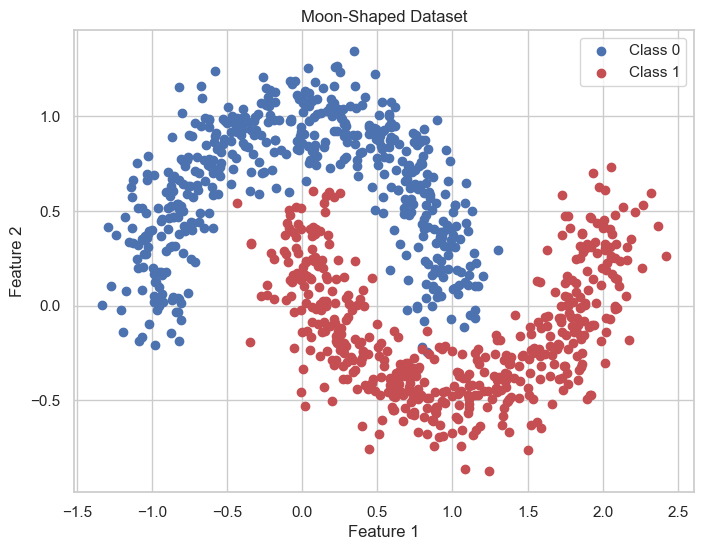

In [15]:
## get data

# Create a moon-shaped dataset with 1000 samples
X, y = utils.make_moons(n_samples=1000, noise=0.15, random_state=42)

# X contains the data points, and y contains their corresponding labels (0 or 1)
utils.plot_moons(X, y)

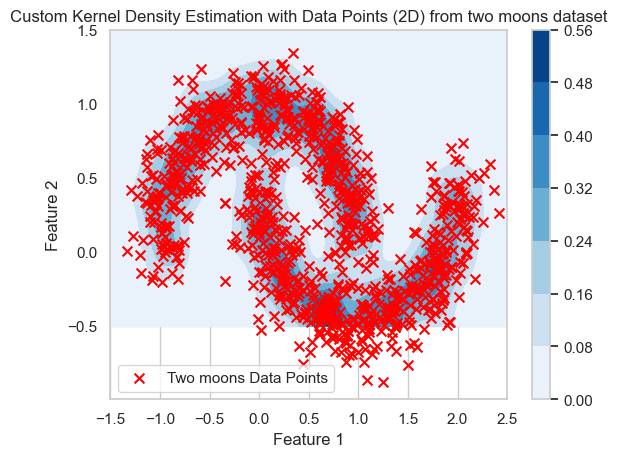

In [16]:
def custom_kernel_density_estimation(data, query_points, bandwidth):
    kde_values = []
    for query_point in query_points:
        # Calculate the kernel density estimate for a single query point
        kde_value = 0
        for data_point in data:
            # Gaussian kernel function
            kernel_value = np.exp(-0.5 * np.sum((query_point - data_point)**2) / bandwidth**2) / (2 * np.pi * bandwidth**2)
            kde_value += kernel_value
        kde_values.append(kde_value / len(data))
    return kde_values

# Set the query points for which you want to estimate the KDE
x_values = np.linspace(-1.5, 2.5, 100)
y_values = np.linspace(-0.5, 1.5, 100)
xx, yy = np.meshgrid(x_values, y_values)
query_points = np.c_[xx.ravel(), yy.ravel()]

# Bandwidth parameter (you can adjust this for smoothing)
bandwidth = 0.1

# Calculate the custom KDE for the query points
custom_kde_values = utils.custom_kernel_density_estimation(X, query_points, bandwidth)

# Reshape the KDE values to match the grid shape
custom_kde_values = np.array(custom_kde_values).reshape(xx.shape)

# Plot the custom KDE as a contour plot
plt.contourf(xx, yy, custom_kde_values, cmap=plt.cm.Blues)
plt.colorbar()
plt.scatter(X[:, 0], X[:, 1], marker='x', label="Two moons Data Points", color='red', s=50)
plt.title("Custom Kernel Density Estimation with Data Points (2D) from two moons dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


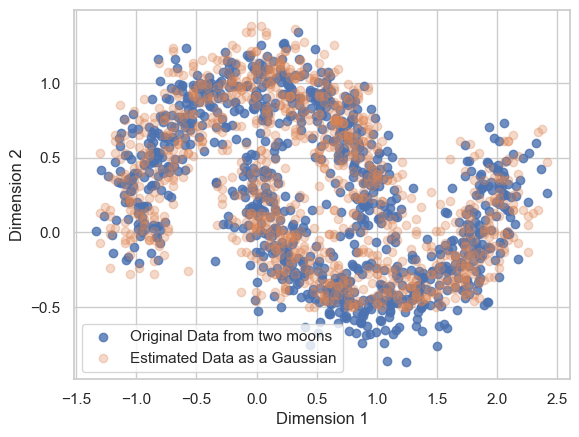

In [17]:
## measure MMD between the generated and the original data
# Normalize the KDE values to make it a proper probability density
custom_kde_values /= np.sum(custom_kde_values)
num_samples = 1000
samples = []
for _ in range(num_samples):
    sample = query_points[np.random.choice(len(query_points), p=custom_kde_values.ravel())]
    samples.append(sample)

# Convert the samples to a NumPy array
samples = np.array(samples)
utils.plot_estimated_real_two_moons(X,samples)

In [18]:
import torch

result = utils.MMD(torch.tensor(X), torch.tensor(samples), kernel="inverse_multi_quadratic")

print(f"MMD result of X and Y is {result.item()}")

MMD result of X and Y is 0.008451143279671669


### TODO: KDE with different bandwith estimation 